<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is02_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

In [6]:
# データセットの読み込み
!wget https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv
df = pd.read_csv("auto-mpg.csv")


# Clean the data: convert 'horsepower' to numeric and drop rows with missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df_clean = df.dropna(subset=['horsepower', 'mpg'])

# Define X (horsepower) and y (MPG)
X = df_clean[['horsepower']].values
y = df_clean['mpg'].values

--2024-10-13 10:21:25--  https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732 (17K) [text/plain]
Saving to: ‘auto-mpg.csv.2’

auto-mpg.csv.2      100%[===================>]  17.32K  --.-KB/s    in 0s      

2024-10-13 10:21:26 (36.7 MB/s) - ‘auto-mpg.csv.2’ saved [17732/17732]



Estimated coefficients (MLE): [23.44591824 -3.70296221]


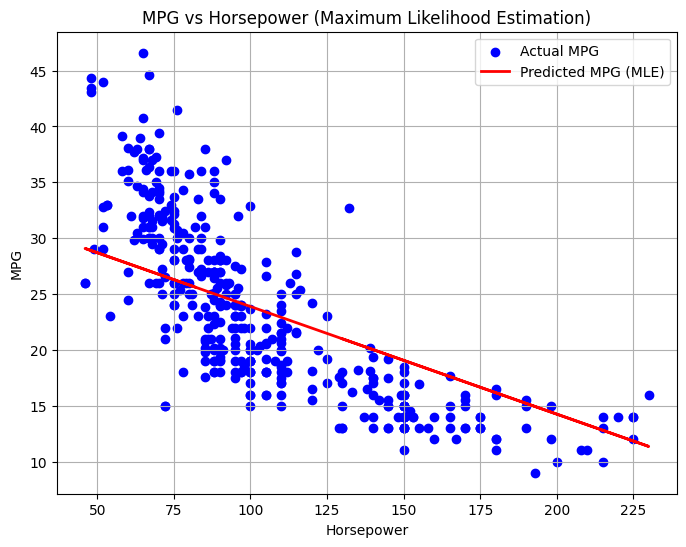

Actual MPG values: [18. 15. 18. 16. 17.]
Predicted MPG values (MLE): [20.98665983 17.61525441 19.06014245 19.06014245 20.02340114]


In [10]:
# Normalize the horsepower feature for better fitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term (column of ones) for the intercept
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])  # Add a column of ones for the intercept

# Define the negative log likelihood function for linear regression with Gaussian assumption
def negative_log_likelihood(beta, X, y):
    # Predict the values using the current beta
    y_pred = np.dot(X, beta)
    # Calculate residuals (errors)
    residuals = y - y_pred
    # Calculate the standard deviation (sigma)
    sigma = np.std(residuals)
    # Calculate the negative log likelihood (we minimize this function)
    return 0.5 * np.sum((residuals / sigma) ** 2)

# Initial parameters (initialize beta with zeros)
initial_beta = np.zeros(X_scaled.shape[1])

# Use scipy's minimize function to find the best beta values using MLE
result = minimize(negative_log_likelihood, initial_beta, args=(X_scaled, y), method='BFGS')

# Get the estimated beta coefficients
beta_mle = result.x
print(f'Estimated coefficients (MLE): {beta_mle}')

# Predict the MPG values using the estimated beta coefficients
y_pred = np.dot(X_scaled, beta_mle)

# Plot the actual MPG values vs the predicted MPG values
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual MPG')
plt.plot(X, y_pred, color='red', label='Predicted MPG (MLE)', linewidth=2)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Maximum Likelihood Estimation)')
plt.legend()
plt.grid(True)
plt.show()

# Show some results
print("Actual MPG values:", y[:5])
print("Predicted MPG values (MLE):", y_pred[:5])
